# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Mario Bros Style

Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/Peach.jpeg")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 6000

2023-05-13 14:17:23.970863: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=17316.53
Iteration 200: loss=10557.39
Iteration 300: loss=7988.38
Iteration 400: loss=6796.37
Iteration 500: loss=5735.81
Iteration 600: loss=5128.83
Iteration 700: loss=4670.11
Iteration 800: loss=4320.42
Iteration 900: loss=4039.45
Iteration 1000: loss=3809.79
Iteration 1100: loss=3617.25
Iteration 1200: loss=3454.01
Iteration 1300: loss=3312.40
Iteration 1400: loss=3188.84
Iteration 1500: loss=3080.61
Iteration 1600: loss=2984.66
Iteration 1700: loss=2898.85
Iteration 1800: loss=2822.46
Iteration 1900: loss=2754.08
Iteration 2000: loss=2691.68
Iteration 2100: loss=2634.92
Iteration 2200: loss=2583.62
Iteration 2300: loss=2536.50
Iteration 2400: loss=2493.04
Iteration 2500: loss=2453.19
Iteration 2600: loss=2416.35
Iteration 2700: loss=2382.35
Iteration 2800: loss=2350.91
Iteration 2900: loss=2321.46
Iteration 3000: loss=2293.87
Iteration 3100: loss=2268.23
Iteration 3200: loss=2244.22
Iteration 3300: loss=2221.62
Iteration 3400: loss=2200.41
Iteration 3500: loss=

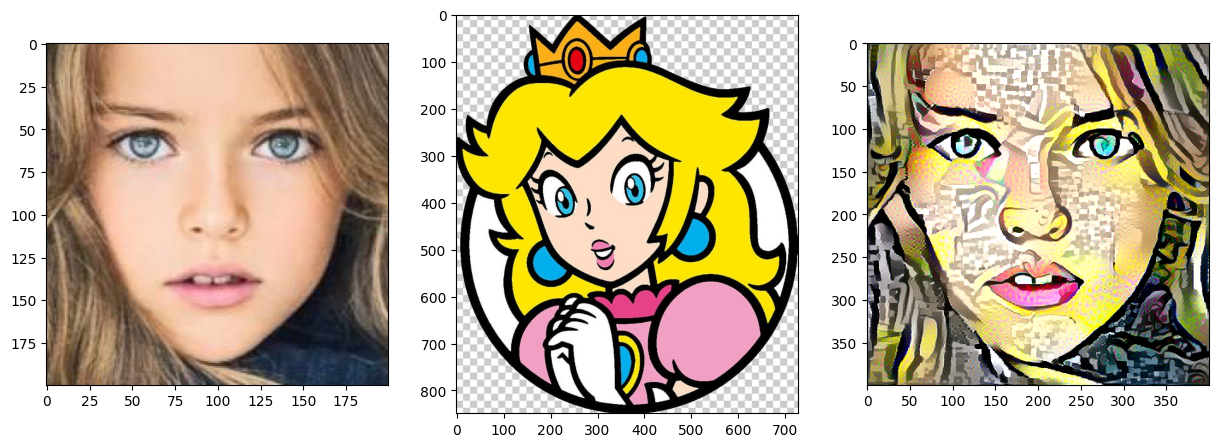

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/MarioBros/Peach_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=6907.82
Iteration 200: loss=4599.78
Iteration 300: loss=3644.86
Iteration 400: loss=3094.13
Iteration 500: loss=2729.09
Iteration 600: loss=2467.06
Iteration 700: loss=2268.46
Iteration 800: loss=2112.10
Iteration 900: loss=1985.86
Iteration 1000: loss=1882.44
Iteration 1100: loss=1795.42
Iteration 1200: loss=1721.23
Iteration 1300: loss=1657.50
Iteration 1400: loss=1602.01
Iteration 1500: loss=1553.42
Iteration 1600: loss=1510.60
Iteration 1700: loss=1472.67
Iteration 1800: loss=1438.72
Iteration 1900: loss=1408.24
Iteration 2000: loss=1380.72
Iteration 2100: loss=1355.68
Iteration 2200: loss=1332.83
Iteration 2300: loss=1311.99
Iteration 2400: loss=1292.94
Iteration 2500: loss=1275.40
Iteration 2600: loss=1259.20
Iteration 2700: loss=1244.20
Iteration 2800: loss=1230.31
Iteration 2900: loss=1217.43
Iteration 3000: loss=1205.49
Iteration 3100: loss=1194.39
Iteration 3200: loss=1184.03
Iteration 3300: loss=1174.33
Iteration 3400: loss=1165.25
Iteration 3500: loss=11

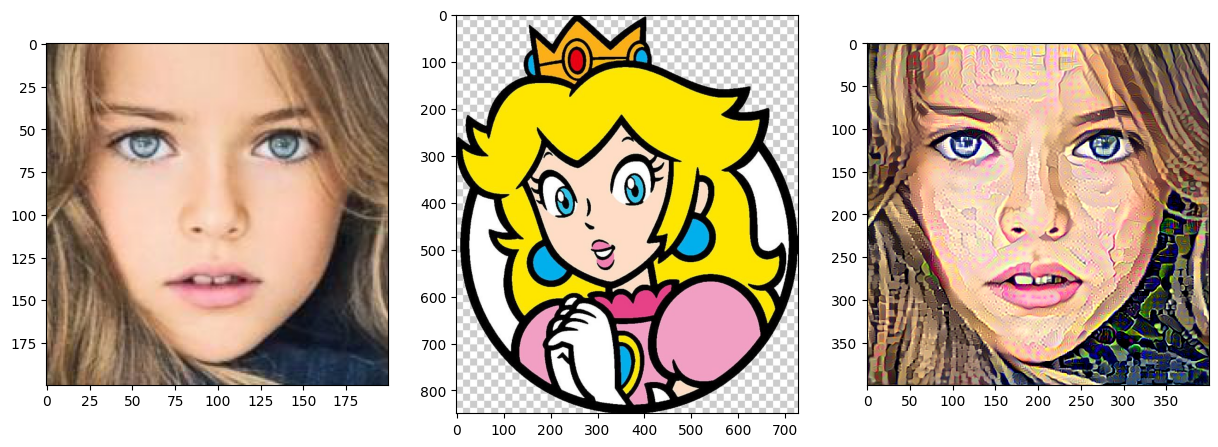

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/MarioBros/Peach_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=23035.64
Iteration 200: loss=11730.52
Iteration 300: loss=9272.53
Iteration 400: loss=7790.79
Iteration 500: loss=6956.98
Iteration 600: loss=6301.43
Iteration 700: loss=5844.83
Iteration 800: loss=5489.03
Iteration 900: loss=5206.69
Iteration 1000: loss=4975.57
Iteration 1100: loss=4782.96
Iteration 1200: loss=4619.73
Iteration 1300: loss=4479.36
Iteration 1400: loss=4354.99
Iteration 1500: loss=4244.31
Iteration 1600: loss=4145.74
Iteration 1700: loss=4058.13
Iteration 1800: loss=3980.23
Iteration 1900: loss=3909.30
Iteration 2000: loss=3844.55
Iteration 2100: loss=3785.98
Iteration 2200: loss=3732.27
Iteration 2300: loss=3682.73
Iteration 2400: loss=3636.44
Iteration 2500: loss=3593.29
Iteration 2600: loss=3553.21
Iteration 2700: loss=3515.93
Iteration 2800: loss=3481.39
Iteration 2900: loss=3449.45
Iteration 3000: loss=3419.65
Iteration 3100: loss=3391.74
Iteration 3200: loss=3365.65
Iteration 3300: loss=3341.28
Iteration 3400: loss=3318.47
Iteration 3500: loss=

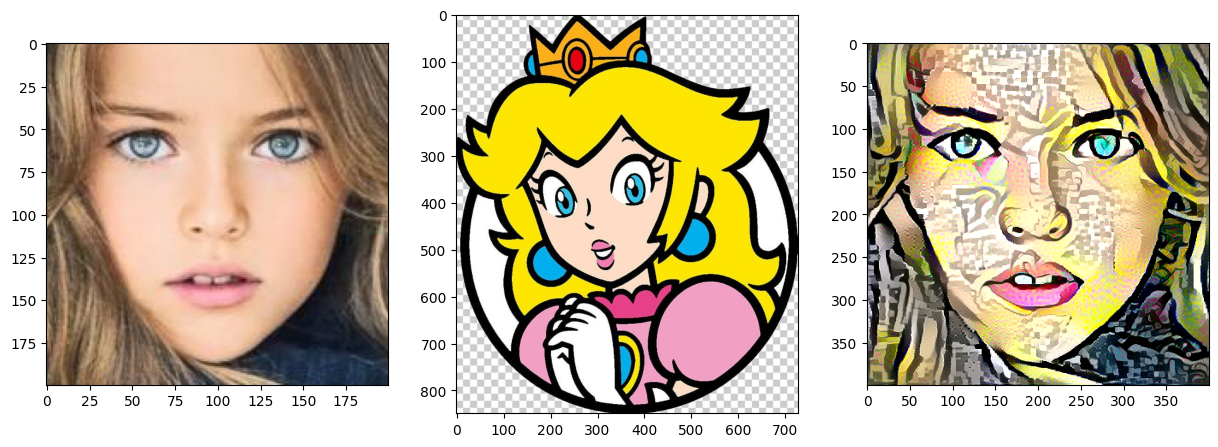

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/MarioBros/Peach_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=5979.63
Iteration 200: loss=3905.84
Iteration 300: loss=3040.73
Iteration 400: loss=2529.69
Iteration 500: loss=2185.43
Iteration 600: loss=1936.08
Iteration 700: loss=1746.48
Iteration 800: loss=1597.44
Iteration 900: loss=1478.57
Iteration 1000: loss=1380.93
Iteration 1100: loss=1299.65
Iteration 1200: loss=1230.98
Iteration 1300: loss=1171.92
Iteration 1400: loss=1121.09
Iteration 1500: loss=1076.87
Iteration 1600: loss=1038.15
Iteration 1700: loss=1003.87
Iteration 1800: loss=973.48
Iteration 1900: loss=946.37
Iteration 2000: loss=922.04
Iteration 2100: loss=899.98
Iteration 2200: loss=879.88
Iteration 2300: loss=861.56
Iteration 2400: loss=844.79
Iteration 2500: loss=829.46
Iteration 2600: loss=815.38
Iteration 2700: loss=802.42
Iteration 2800: loss=790.47
Iteration 2900: loss=779.37
Iteration 3000: loss=769.07
Iteration 3100: loss=759.50
Iteration 3200: loss=750.59
Iteration 3300: loss=742.30
Iteration 3400: loss=734.54
Iteration 3500: loss=727.29
Iteration 36

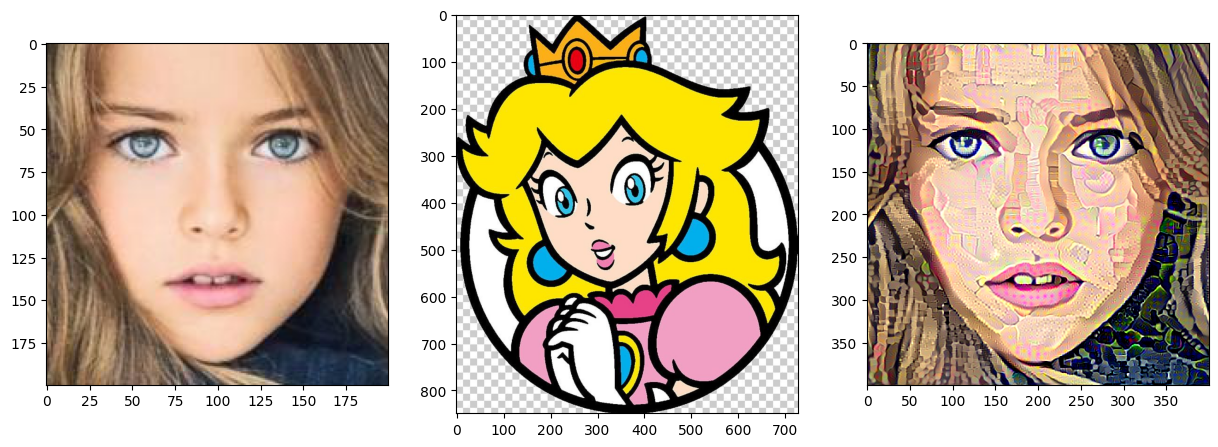

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/MarioBros/Peach_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=11313.35
Iteration 200: loss=6399.79
Iteration 300: loss=4712.92
Iteration 400: loss=3848.57
Iteration 500: loss=3316.11
Iteration 600: loss=2949.72
Iteration 700: loss=2678.12
Iteration 800: loss=2468.24
Iteration 900: loss=2301.68
Iteration 1000: loss=2166.51
Iteration 1100: loss=2054.20
Iteration 1200: loss=1958.95
Iteration 1300: loss=1876.84
Iteration 1400: loss=1805.77
Iteration 1500: loss=1743.75
Iteration 1600: loss=1689.04
Iteration 1700: loss=1640.36
Iteration 1800: loss=1596.67
Iteration 1900: loss=1557.14
Iteration 2000: loss=1521.23
Iteration 2100: loss=1488.43
Iteration 2200: loss=1458.48
Iteration 2300: loss=1431.23
Iteration 2400: loss=1406.26
Iteration 2500: loss=1383.29
Iteration 2600: loss=1362.07
Iteration 2700: loss=1342.44
Iteration 2800: loss=1324.18
Iteration 2900: loss=1307.16
Iteration 3000: loss=1291.32
Iteration 3100: loss=1276.48
Iteration 3200: loss=1262.63
Iteration 3300: loss=1249.70
Iteration 3400: loss=1237.64
Iteration 3500: loss=1

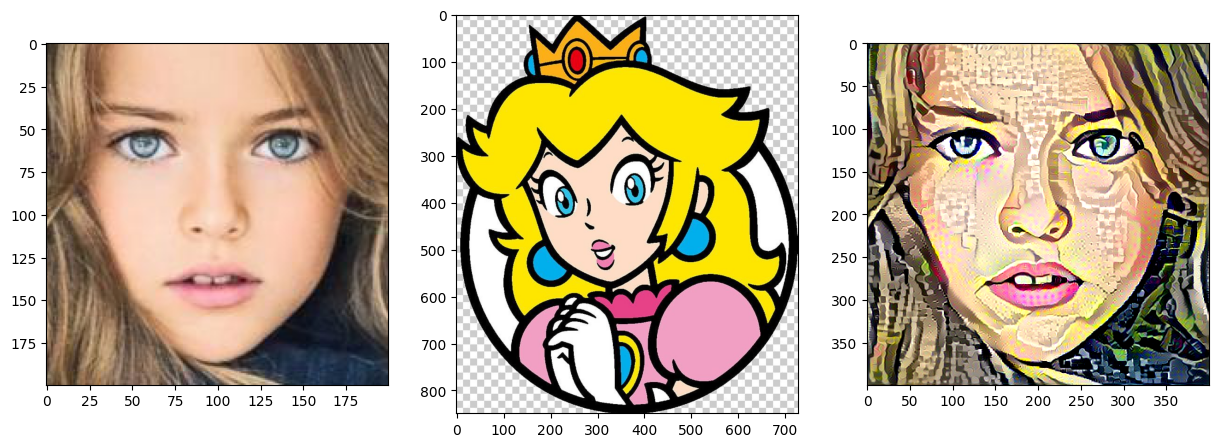

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/MarioBros/Peach_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()